# SVM

In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.5 MB/s eta 0:00:00


# Binary Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn  # Dataset을 가져오기 위한 utility module
from sklearn.svm import SVC  # 분류작업이기 때문에 SVC

# decision boundaries가 잘 만들어졌는지 확인
# 일반적인 방식으로는 그래프를 그리기가 힘듦
# 결정경계를 잘 그릴 수 있는 library를 사용
from mlxtend.plotting import plot_decision_regions

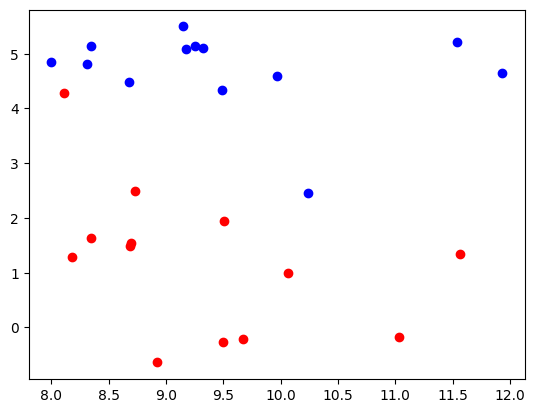

In [ ]:
# Raw Data Loading
x_data, t_data = mglearn.datasets.make_forge()
# print(t_data)
# [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
# print(x_data)
# [[ 9.96346605  4.59676542]
#  [11.0329545  -0.16816717]
#  [11.54155807  5.21116083]
#  [ 8.69289001  1.54322016]

# matplotlib을 이용해서 데이터 scatter 확인
# 각 데이터(x_data)에 대해 t_data가 0이면 red, 1이면 blue점으로 표시

x_data_red = x_data[t_data == 0]
x_data_blue = x_data[t_data == 1]

plt.scatter(x_data_red[:, 0],
            x_data_red[:, 1],
            color='r')

plt.scatter(x_data_blue[:, 0],
            x_data_blue[:, 1],
            color='b')

plt.show()

[[ 8.1062269   4.28695977]
 [ 8.7337095   2.49162431]
 [11.563957    1.3389402 ]
 [ 8.67494727  4.47573059]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]
[3 3]


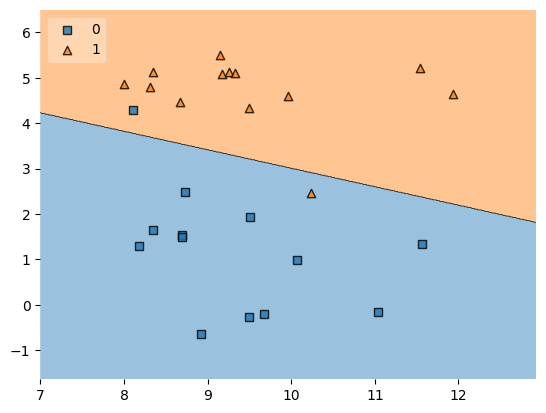

In [ ]:
# Model 생성
model = SVC(kernel='linear')

# 학습
model.fit(x_data, t_data)

# 모델 학습이 끝나고 우리가 알아낸 support vector
print(model.support_vectors_)
print(model.n_support_)  # [3 3], 클래스가 2개이며 각 클래스에 서포트 벡터가 3개씩 있음

# decision boundaries
plot_decision_regions(X=x_data,
                      y=t_data,
                      clf=model,
                      legend=2)

plt.show()

# Multinomial Classification
- Iris 데이터 사용
- feature가 4개이므로 decision boundaries를 그리기 어려움
- 차원 축소 이용
- 상관관계분석을 통해 feature 제거

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.71      0.71      0.71        14
           2       0.69      0.69      0.69        13

    accuracy                           0.79        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.79      0.79      0.79        39

0.7948717948717948


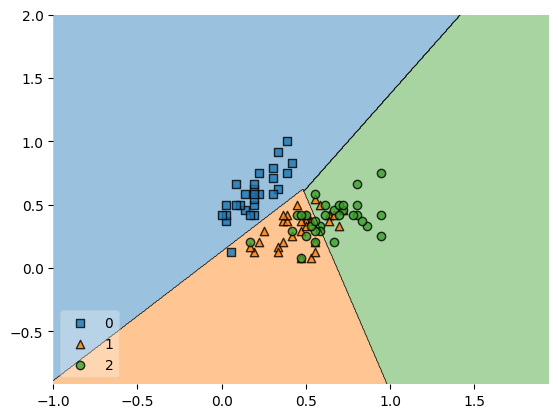

In [ ]:
# Module import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Raw Data Loading
Iris = load_iris()

# DataFrame
df_iris = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df_iris['target'] = Iris.target
# df_iris.corr()
df_iris.drop(['petal length (cm)', 'petal width (cm)'], axis=1, inplace=True)

# 중복 데이터 제거
df_iris = df_iris.drop_duplicates()

# feature, target 추출
x_data = df_iris.drop('target', axis=1).values
t_data = df_iris['target'].values

# normalization
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# train, test split
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=0)

# Model
model = SVC(kernel='linear',
            C=3)  # C: Cost값이 크면 다른 범주에 놓이는 data포인트를 적게 한다.
                  # overfitting의 위험

# 학습
model.fit(x_data_train_norm, t_data_train)

# 출력
# print(model.support_vectors_)
# print(model.n_support_)

# 정확도
pred = model.predict(x_data_test_norm)
print(classification_report(t_data_test, pred))
print(accuracy_score(t_data_test, pred))

# decision regions
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model,
                      legend=3)

plt.show()

- feature를 그냥 없앴더니 결과가 상당히 좋지 않음
- 의미 있는 feature와 의미 없는 feature의 구분이 필요

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.81      0.93      0.87        14
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.91      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38

0.8947368421052632


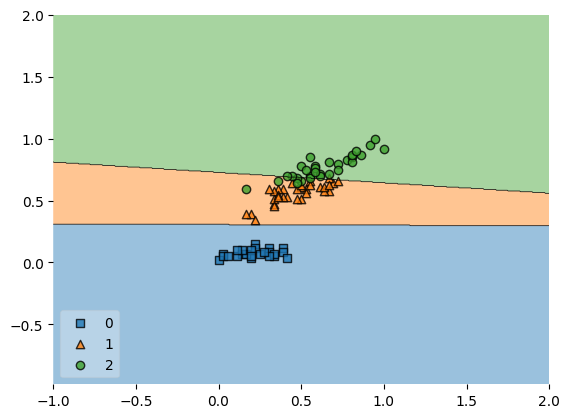

In [ ]:
# feature를 변경

# Module import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Raw Data Loading
Iris = load_iris()

# DataFrame
df_iris = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df_iris['target'] = Iris.target
# df_iris.corr()
df_iris.drop(['sepal width (cm)', 'petal width (cm)'], axis=1, inplace=True)

# 중복 데이터 제거
df_iris = df_iris.drop_duplicates()

# feature, target 추출
x_data = df_iris.drop('target', axis=1).values
t_data = df_iris['target'].values

# normalization
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# train, test split
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=0)

# Model
model = SVC(kernel='linear', C=3)

# 학습
model.fit(x_data_train_norm, t_data_train)

# 출력
# print(model.support_vectors_)
# print(model.n_support_)

# 정확도
pred = model.predict(x_data_test_norm)
print(classification_report(t_data_test, pred))
print(accuracy_score(t_data_test, pred))

# decision regions
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model,
                      legend=3)

plt.show()

- 약간의 향상을 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777


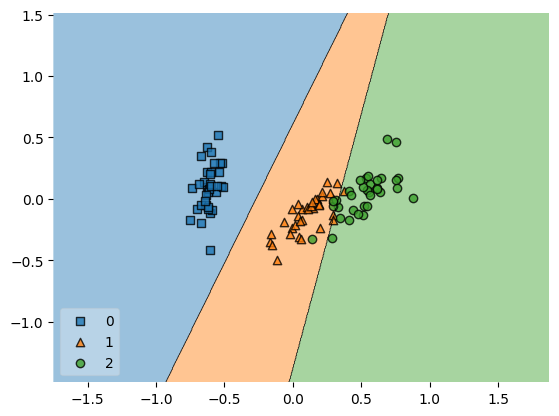

In [ ]:
# PCA를 사용

# Module import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Raw Data Loading
Iris = load_iris()

# DataFrame
df_iris = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df_iris['target'] = Iris.target
# df_iris.corr()

# 중복 데이터 제거
df_iris = df_iris.drop_duplicates()

# feature, target 추출
x_data = df_iris.drop('target', axis=1).values
t_data = df_iris['target'].values

# normalization
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# PCA
n_components = 2
pca = PCA(n_components = n_components)
x_data_norm_pca = pca.fit_transform(x_data_norm)

# train, test split
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm_pca,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=0)

# Model
model = SVC(kernel='linear', C=3)

# 학습
model.fit(x_data_train_norm, t_data_train)

# 출력
# print(model.support_vectors_)
# print(model.n_support_)

# 정확도
pred = model.predict(x_data_test_norm)
print(classification_report(t_data_test, pred))
print(accuracy_score(t_data_test, pred))

# decision regions
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model,
                      legend=3)

plt.show()

# GridSearch
- 마지막 SVM모델
- feature 4개를 다 이용
- hyperparameter를 자동화해서 지정

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Raw Data Loading
Iris = load_iris()
df_iris = pd.DataFrame(Iris.data, columns=Iris.feature_names)
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris['target'] = Iris.target

# 중복 데이터 제거
df_iris = df_iris.drop_duplicates()

# feature, target 추출
x_data = df_iris.drop('target', axis=1).values
t_data = df_iris['target'].values

# normalization
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# train, test split
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm_pca,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=0)
# param_grid 설정
param_grid = [{'kernel': ['linear'],
               'C': [0.1, 0.5, 10, 100]
              },
              {'kernel': ['rbf'],
              'C': [0.1, 0.5, 10, 100],
              'gamma': [0.001, 0.01, 0.1]}]

# Model
model = SVC()

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1)

grid_search.fit(x_data_train_norm,
                t_data_train)

# 가장 좋은 parameter 확인
print(grid_search.best_params_)
print(grid_search.best_score_)

# 가장 좋은 parameter를 알아냈으니 모델 만들기
model = SVC(kernel='rbf',
            C=100,
            gamma=0.1)

# 학습
model.fit(x_data_train_norm,
          t_data_train)

# 평가
print(accuracy_score(t_data_test, model.predict(x_data_test_norm)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.9609523809523809
0.9777777777777777
